In [1]:
import os
import cv2
import numpy  as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

In [2]:
# Function to load and preprocess images
def load_and_preprocess_images(directory, label):
    img_list = []
    label_list = []
    for filename in os.listdir(directory):
        if filename.endswith((".jpg",".jpeg",".png")):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_width, img_height))
            img = img / 255.0  # Normalize pixel values to be between 0 and 1
            img_list.append(img)
            label_list.append(label)
    return img_list, label_list

# Function to apply image augmentation (flip-Rotate)
def Flip_augmentation(images_list, labels_list): 
    images = []
    labels = []
    for img, label in zip(images_list, labels_list):
        flipped_img = np.fliplr(img)        # Flip the image
        images.append(flipped_img)
        labels.append(label)
    return images, labels

def Rotation_augmentation(images_list, labels_list, Angel): 
    images = []
    labels = []
    for img, label in zip(images_list, labels_list):
        rotated_img = np.rot90(img, Angel // 90)   # Rotate the image
        images.append(rotated_img)
        labels.append(label)
    return images, labels

In [3]:
classes = ['NORMAL', 'COVID']
#Import Train Data
Train_dataset_dir = r'C:\Users\shahrooz\Desktop\Neural Network\HW2\Code\train-dataset' #Path to dataset
Train_covid_dir = os.path.join(Train_dataset_dir, 'COVID')
Train_normal_dir = os.path.join(Train_dataset_dir, 'NORMAL')
# Define the image dimensions
img_height, img_width, img_channel = 150, 150 , 3
# Define the lists to store images and labels
Train_images = []
Train_labels = []
# Load and preprocess original COVID images (label = 1)
Train_covid_images, Train_covid_labels = load_and_preprocess_images(Train_covid_dir, 1)
# Load and preprocess original NORMAL images (label = 0)
Train_normal_images, Train_normal_labels = load_and_preprocess_images(Train_normal_dir, 0)
# Append original images and labels to the lists
Train_images.extend(Train_covid_images + Train_normal_images)
Train_labels.extend(Train_covid_labels + Train_normal_labels)

Shape of images array: (148, 150, 150, 3)
Shape of labels array: (148,)


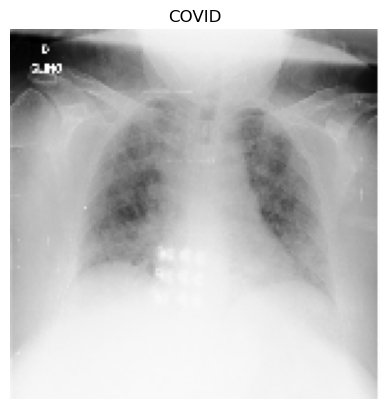

In [4]:
# Image informations
images = []                   # Save Train images list  
labels = []                   # Save Train labels list 
images = Train_images.copy()         # Save Train images list  
labels = Train_labels.copy()         # Save Train labels list 
print("Shape of images array:", np.array(images).shape)     # Display the shape of the arrays before first augmentation
print("Shape of labels array:", np.array(labels).shape)     # Display the shape of the arrays before first augmentation
plt.imshow(images[0])
plt.title(classes[labels[0]])
plt.axis("Off");
plt.show()

Shape of images array (Main + flipped): (296, 150, 150, 3)
Shape of labels array (Main + flipped): (296,)


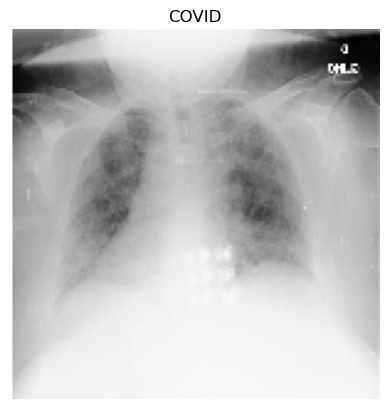

In [5]:
# Flip Augmentation : 
flipped_images, flipped_labels = Flip_augmentation(Train_images, Train_labels)
images.extend(flipped_images)
labels.extend(flipped_labels)
print("Shape of images array (Main + flipped):", np.array(images).shape)     # Display the shape of the arrays before first augmentation
print("Shape of labels array (Main + flipped):", np.array(labels).shape)     # Display the shape of the arrays before first augmentation
plt.imshow(images[148])
plt.title(classes[labels[148]])
plt.axis("Off");
plt.show()

Shape of images array (Main + flipped + rotated): (444, 150, 150, 3)
Shape of labels array (Main + flipped + rotated): (444,)


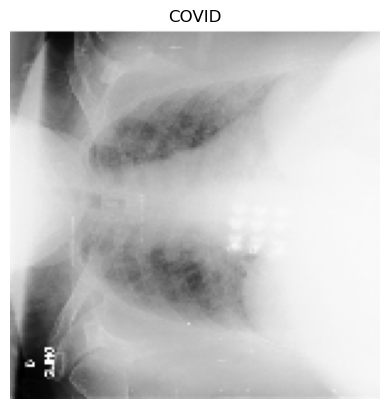

In [6]:
# 90rotation Augmentation : 
rotate90_images, rotate90_labels = Rotation_augmentation(Train_images, Train_labels,90)
images.extend(rotate90_images)
labels.extend(rotate90_labels)
print("Shape of images array (Main + flipped + rotated):", np.array(images).shape)     # Display the shape of the arrays before first augmentation
print("Shape of labels array (Main + flipped + rotated):", np.array(labels).shape)     # Display the shape of the arrays before first augmentation
plt.imshow(images[296])
plt.title(classes[labels[296]])
plt.axis("Off");
plt.show()

Shape of images array (Main + flipped + rotated): (592, 150, 150, 3)
Shape of labels array (Main + flipped + rotated): (592,)


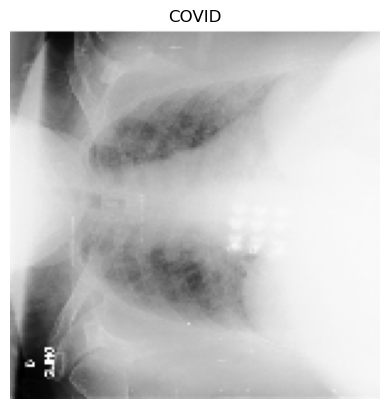

In [7]:
# 180rotation Augmentation : 
rotate180_images, rotate180_labels = Rotation_augmentation(Train_images, Train_labels,180)
images.extend(rotate180_images)
labels.extend(rotate180_labels)
print("Shape of images array (Main + flipped + rotated):", np.array(images).shape)     # Display the shape of the arrays before first augmentation
print("Shape of labels array (Main + flipped + rotated):", np.array(labels).shape)     # Display the shape of the arrays before first augmentation
plt.imshow(images[444])
plt.title(classes[labels[444]])
plt.axis("Off");
plt.show()

In [8]:
Input_images = np.array(images)     # Convert lists to NumPy arrays
Input_labels = np.array(labels)     # Convert lists to NumPy arrays
print("Shape of first list of input images:", np.array(Input_images).shape)     # Display the shape of the input arrays
print("Shape of first list of input labels:", np.array(Input_labels).shape)     # Display the shape of the input arrays

Shape of first list of input images: (592, 150, 150, 3)
Shape of first list of input labels: (592,)


In [9]:
validation_split = 0.15          # Define the training-validation split ratio (e.g., 85-15 split)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Input_images,Input_labels, test_size=validation_split, random_state=24)
print("Shape of train images :", X_train.shape)
print("Shape of train labels :", y_train.shape)
print("Shape of validation images :", X_val.shape) 
print("Shape of validation labels :", y_val.shape)
# Define batch size and number of epochs
batch_size = 32
epochs = 25

Shape of train images : (503, 150, 150, 3)
Shape of train labels : (503,)
Shape of validation images : (89, 150, 150, 3)
Shape of validation labels : (89,)


In [10]:
# Define Model
# Clear the previous model
tf.keras.backend.clear_session()
# Define CNN model
model = models.Sequential()
# Input layer
model.add(layers.Input(shape=(150, 150, 3)))
# Layer 1: Convolutional layer with 64 filters, 3x3 kernel size
model.add(layers.Conv2D(64, (3, 3), input_shape=(150, 150, 3), padding='same'))
# Layer 2: MaxPooling layer with 2x2 pooling size
model.add(layers.MaxPooling2D((2, 2)))
# Layer 3: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 4: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 5: Dropout layer with 20% dropout rate
model.add(layers.Dropout(0.2))
# Layer 6: Convolutional layer with 64 filters, 3x3 kernel size
model.add(layers.Conv2D(64, (3, 3), padding='same'))
# Layer 7: MaxPooling layer with 2x2 pooling size
model.add(layers.MaxPooling2D((2, 2)))
# Layer 8: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 9: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 10: Dropout layer with 20% dropout rate
model.add(layers.Dropout(0.2))
# Layer 11: Convolutional layer with 128 filters, 3x3 kernel size
model.add(layers.Conv2D(128, (3, 3), padding='same'))
# Layer 12: MaxPooling layer with 2x2 pooling size
model.add(layers.MaxPooling2D((2, 2)))
# Layer 13: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 14: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 15: Dropout layer with 20% dropout rate
model.add(layers.Dropout(0.2))
# Layer 16: Convolutional layer with 128 filters, 3x3 kernel size
model.add(layers.Conv2D(128, (3, 3), padding='same'))
# Layer 17: MaxPooling layer with 2x2 pooling size
model.add(layers.MaxPooling2D((2, 2)))
# Layer 18: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 19: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 20: Dropout layer with 20% dropout rate
model.add(layers.Dropout(0.2))
# Layer 21: Convolutional layer with 256 filters, 3x3 kernel size
model.add(layers.Conv2D(256, (3, 3), padding='same'))
# Layer 22: MaxPooling layer with 2x2 pooling size
model.add(layers.MaxPooling2D((2, 2)))
# Layer 23: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 24: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 25: Dropout layer with 20% dropout rate
model.add(layers.Dropout(0.2))
# Layer 26: Convolutional layer with 256 filters, 3x3 kernel size
model.add(layers.Conv2D(256, (3, 3), padding='same'))
# Layer 27: MaxPooling layer with 2x2 pooling size
model.add(layers.MaxPooling2D((2, 2)))
# Layer 28: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 29: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 30: Dropout layer with 20% dropout rate
model.add(layers.Dropout(0.2))
# Layer 31: Flattening layer
model.add(layers.Flatten())
# Layer 32: Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(512, activation='relu'))
# Layer 33: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 34: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 35: Dense layer with 256 neurons and ReLU activation
model.add(layers.Dense(256, activation='relu'))
# Layer 36: BatchNormalization layer
model.add(layers.BatchNormalization(axis=-1))
# Layer 37: Activation layer with ReLU function
model.add(layers.Activation('relu'))
# Layer 38: Output layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))
# Display the model summary to check the structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 75, 75, 64)        0         
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        3

In [11]:
#Train model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Set the learning rate for the Adam optimizer
learning_rate = 0.01  
# Create an Adam optimizer with the specified learning rate
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# Compile the model with the customized Adam optimizer
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Define a ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
history = model.fit(X_train, y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val, y_val),callbacks=[checkpoint])

Epoch 1/25
16/16 [==============================] - 84s 4s/step - loss: 0.8059 - accuracy: 0.7018 - val_loss: 681.9796 - val_accuracy: 0.4607
Epoch 2/25
16/16 [==============================] - 59s 4s/step - loss: 0.4166 - accuracy: 0.8310 - val_loss: 95.9828 - val_accuracy: 0.4607
Epoch 3/25
16/16 [==============================] - 57s 4s/step - loss: 0.3410 - accuracy: 0.8608 - val_loss: 9.0577 - val_accuracy: 0.5169
Epoch 4/25
16/16 [==============================] - 51s 3s/step - loss: 0.2317 - accuracy: 0.9284 - val_loss: 2.5191 - val_accuracy: 0.6966
Epoch 5/25
16/16 [==============================] - 30s 2s/step - loss: 0.1620 - accuracy: 0.9483 - val_loss: 3.1513 - val_accuracy: 0.6854
Epoch 6/25
16/16 [==============================] - 29s 2s/step - loss: 0.1032 - accuracy: 0.9702 - val_loss: 3.8397 - val_accuracy: 0.7079
Epoch 7/25
16/16 [==============================] - 29s 2s/step - loss: 0.0633 - accuracy: 0.9781 - val_loss: 5.5564 - val_accuracy: 0.6404
Epoch 8/25
16/16 

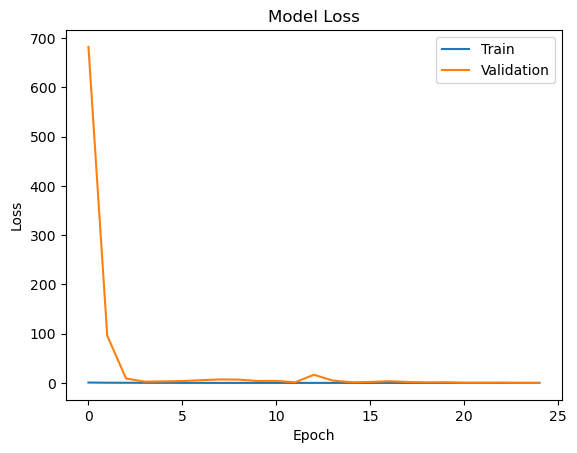

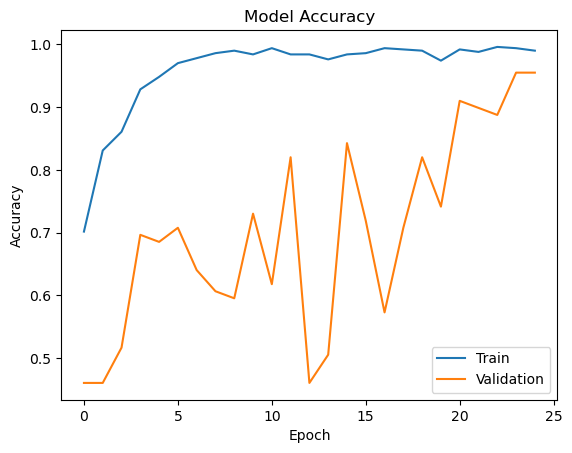

In [12]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()